# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Saya ingin melakukan web scraping dari website https://www.exchange-rates.org/history/IDR/USD/T untuk menampilkan pergerakan kurs USD-IDR selama 2022 dan memvisualisasikannya ke dalam bentuk plot.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [105]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [106]:
url_get.content[1:21]

b'!DOCTYPE html>\r\n<!--'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [107]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [108]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [109]:
print(soup.prettify()[ :400])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scal


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [110]:
soup.find('div')

<div class="layout locale_en-US">
<a class="scrollup tooltips" data-placement="left" data-toggle="tooltip" href="" title="Scroll to top"></a>
<!-- header -->
<header>
<nav>
<div class="container"><!-- Brand and toggle get grouped for better mobile display -->
<a class="navbar-brand" href="/">
<div class="logo-text">
<h1><strong>Exchange-Rates<span>.org</span></strong></h1>
<h3 class="sub-text">world currency exchange rates<br/>  and currency exchange rate history</h3>
</div>
</a>
<ul class="main-nav">
<li class="mobile-menu-action hidden-md hidden-lg">
<a class="btn-header" href="/converter">
<span class="sr-only">Calculator</span>
<svg class="icon icon-calculator" viewbox="0 0 27 32"><use xlink:href="#icon-calculator"></use></svg>
</a>
</li>
<li class="mobile-menu-action hidden-md hidden-lg">
<button class="navbar-toggle btn-header drop-toggle" data-target="#mobile-nav" type="button">
<span class="sr-only">Toggle navigation</span>
<span class="btn-bar"></span>
<span class="btn-bar"></

In [111]:
table = soup.find('div', attrs={'class':'table-responsive'})
print(table.prettify()[0:400])

<div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     7/7/2022
    </td>
    <td>
     Thursday
    </td>
    <td>
     <a href="/Rate/USD/IDR/7-7-2022">
      14,964.65000
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/7-7-2022">
      USD 


In [112]:
table.find_all('tr')

[<tr><td>7/7/2022</td><td>Thursday</td><td><a href="/Rate/USD/IDR/7-7-2022">14,964.65000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2022">USD IDR rate for 7/7/2022</a></td></tr>,
 <tr><td>7/6/2022</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/7-6-2022">14,996.82520</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-6-2022">USD IDR rate for 7/6/2022</a></td></tr>,
 <tr><td>7/5/2022</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/7-5-2022">15,014.65000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-5-2022">USD IDR rate for 7/5/2022</a></td></tr>,
 <tr><td>7/4/2022</td><td>Monday</td><td><a href="/Rate/USD/IDR/7-4-2022">14,994.55000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-4-2022">USD IDR rate for 7/4/2022</a></td></tr>,
 <tr><td>7/1/2022</td><td>Friday</td><td><a href="/Rate/USD/IDR/7-1-2022">14,975.15000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rat

In [113]:
table.find_all('tr')[0].text

'7/7/2022Thursday14,964.65000 IDRUSD IDR rate for 7/7/2022'

Finding row length.

In [114]:
Findrow = table.find_all('tr')
row_length = len(Findrow)

In [115]:
Findrow

[<tr><td>7/7/2022</td><td>Thursday</td><td><a href="/Rate/USD/IDR/7-7-2022">14,964.65000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2022">USD IDR rate for 7/7/2022</a></td></tr>,
 <tr><td>7/6/2022</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/7-6-2022">14,996.82520</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-6-2022">USD IDR rate for 7/6/2022</a></td></tr>,
 <tr><td>7/5/2022</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/7-5-2022">15,014.65000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-5-2022">USD IDR rate for 7/5/2022</a></td></tr>,
 <tr><td>7/4/2022</td><td>Monday</td><td><a href="/Rate/USD/IDR/7-4-2022">14,994.55000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-4-2022">USD IDR rate for 7/4/2022</a></td></tr>,
 <tr><td>7/1/2022</td><td>Friday</td><td><a href="/Rate/USD/IDR/7-1-2022">14,975.15000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rat

In [133]:
Findrow = table.find_all('tr')
row_length = len(Findrow)

In [134]:
row_length

129

Do the scrapping process here (please change this markdown with your explanation)

In [135]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    
    #scrapping process
    
    #get Date
    period = Findrow[i].find_all('td')[0].text
    
    #get harga harian
    harga_harian = Findrow[i].find_all('td')[2].text
    harga_harian = harga_harian.strip()
       
    
    temp.append((period, harga_harian))
    
temp 

[('7/7/2022', '14,964.65000 IDR'),
 ('7/6/2022', '14,996.82520 IDR'),
 ('7/5/2022', '15,014.65000 IDR'),
 ('7/4/2022', '14,994.55000 IDR'),
 ('7/1/2022', '14,975.15000 IDR'),
 ('6/30/2022', '14,928.80000 IDR'),
 ('6/29/2022', '14,868.90000 IDR'),
 ('6/28/2022', '14,852.35000 IDR'),
 ('6/27/2022', '14,807.70000 IDR'),
 ('6/24/2022', '14,829.50000 IDR'),
 ('6/23/2022', '14,848.80000 IDR'),
 ('6/22/2022', '14,833.90000 IDR'),
 ('6/21/2022', '14,833.60000 IDR'),
 ('6/20/2022', '14,827.75000 IDR'),
 ('6/17/2022', '14,838.85000 IDR'),
 ('6/16/2022', '14,809.20000 IDR'),
 ('6/15/2022', '14,695.10000 IDR'),
 ('6/14/2022', '14,764.20000 IDR'),
 ('6/13/2022', '14,782.80000 IDR'),
 ('6/10/2022', '14,614.95000 IDR'),
 ('6/9/2022', '14,611.85000 IDR'),
 ('6/8/2022', '14,513.20000 IDR'),
 ('6/7/2022', '14,465.30000 IDR'),
 ('6/6/2022', '14,437.70000 IDR'),
 ('6/3/2022', '14,433.50000 IDR'),
 ('6/2/2022', '14,435.00000 IDR'),
 ('6/1/2022', '14,555.60000 IDR'),
 ('5/31/2022', '14,580.63428 IDR'),
 ('5

## Creating data frame & Data wrangling

Put the array into dataframe

In [120]:
import pandas as pd

exchangerate = pd.DataFrame(temp, columns=('tanggal', 'harga harian'))
exchangerate.head()

,tanggal,harga harian
0,7/7/2022,"14,964.65000 IDR"
1,7/6/2022,"14,996.82520 IDR"
2,7/5/2022,"15,014.65000 IDR"
3,7/4/2022,"14,994.55000 IDR"
4,7/1/2022,"14,975.15000 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [121]:
exchangerates = exchangerate[::-1]

In [122]:
exchangerates['harga harian'] = exchangerates['harga harian'].str.replace("IDR"," ")

In [126]:
exchangerates['harga harian'] = exchangerates['harga harian'].str.replace(",","")

In [127]:
exchangerates['harga harian'] = exchangerates['harga harian'].astype('float64')

In [ ]:
exchangerates['tanggal'] = exchangerates['tanggal'].astype('datetime64')

In [124]:
exchangerates.head()

,tanggal,harga harian
128,1/10/2022,"14,290.15000"
127,1/11/2022,"14,284.46501"
126,1/12/2022,"14,298.95000"
125,1/13/2022,"14,309.00000"
124,1/14/2022,"14,314.55000"


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [99]:
exchangerates['harga harian'] = exchangerates['harga harian'].replace(",",".")

In [96]:
exchangerates['harga harian'] = exchangerates['harga harian'].replace(" ","")

In [128]:
exchangerates

,tanggal,harga harian
128,1/10/2022,14290.15000
127,1/11/2022,14284.46501
126,1/12/2022,14298.95000
125,1/13/2022,14309.00000
124,1/14/2022,14314.55000
...,...,...
4,7/1/2022,14975.15000
3,7/4/2022,14994.55000
2,7/5/2022,15014.65000
1,7/6/2022,14996.82520


**Memvisualisasikan**

In [130]:
exchangerates.index=exchangerates["tanggal"]
exchangerates.drop(['tanggal'],axis=1,inplace=True)

<AxesSubplot:xlabel='tanggal'>

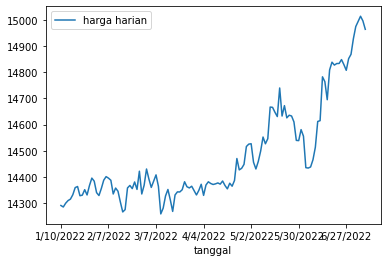

In [131]:
exchangerates.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Plot ini menampilkan data pergerakan kurs USD-IDR. Yang mana kalau dibahasakan untuk orang awam adalah berapa sih 1 USD kalau diconvert ke 1 rupiah. Di plot ini menampilkan pergerakan kurs USD-IDR selama periode Januari-Juli 2022.

Dari plotnya dapat kita lihat meskupun pergerakannya banyak terfluktuasi di beberapa bagian, tapi secara *long run* dari Januari ke Juli pergerakannnya mengalami kenaikan dari yang awalnya sekitar 1 USD = Rp 14300 menjadi sekitar 1 USD = Rp 14950 pada akhir plot.

Dari sini kita bisa memberikan analisis bahwa Rupiah selama periode Januari-Juli 2022 mengalami pelemahan dari yang tadinya 1 USD sama dengan sekitar Rp 14300 di awal 2022 dan mengalami pelemahan sampai akhirnya pada Juli 2022 menjadi hampir Rp 15000


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.